In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

In [3]:
# Load each country's cleaned CSV
countries = ["benin", "sierraleone", "togo"]
dfs = {}
for country in countries:
    dfs[country] = pd.read_csv(f"data/cleaned/{country}_clean.csv")
    dfs[country]['Country'] = country  # Add country label

# Combine into a single DataFrame
df_all = pd.concat(dfs.values(), ignore_index=True)


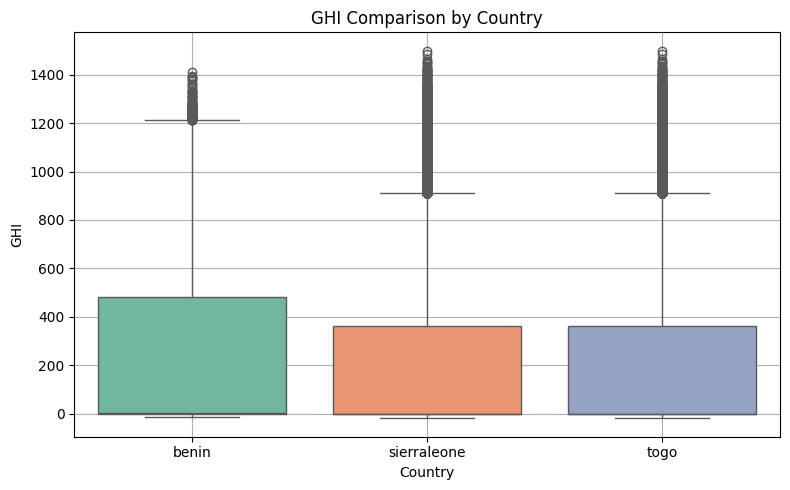

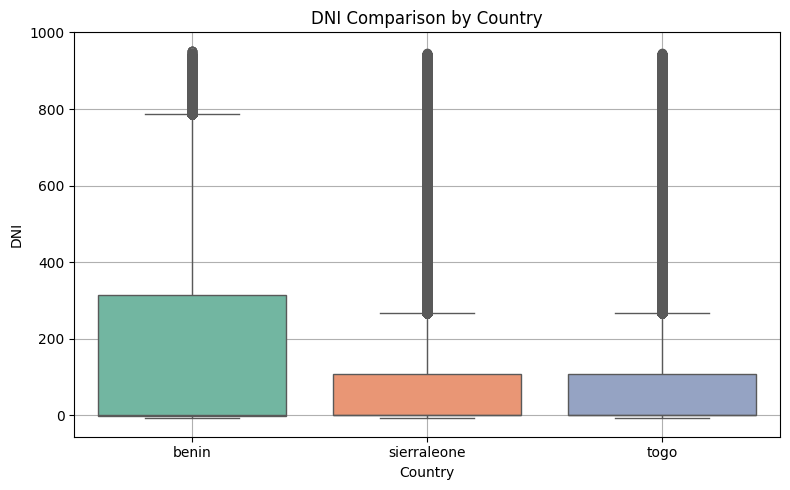

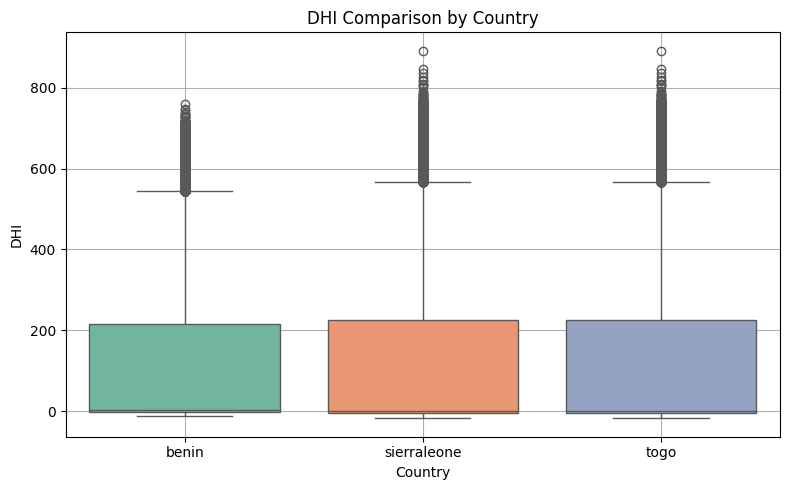

In [8]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric, hue='Country', palette='Set2', legend=False)
    plt.title(f"{metric} Comparison by Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [5]:
summary_table = df_all.groupby("Country")[metrics].agg(['mean', 'median', 'std']).round(2)
display(summary_table)


GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
sierraleone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
togo         201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   

                     
                std  
Country              
benin        158.69  
sierraleone  158.95  
togo         158.95

In [10]:
# Prepare GHI data per country
ghi_data = [dfs[country]['GHI'].dropna() for country in countries]

# Run one-way ANOVA
f_stat, p_value_anova = f_oneway(*ghi_data)

display(f"ANOVA p-value: {p_value_anova:.4f}")


'ANOVA p-value: 0.0000'

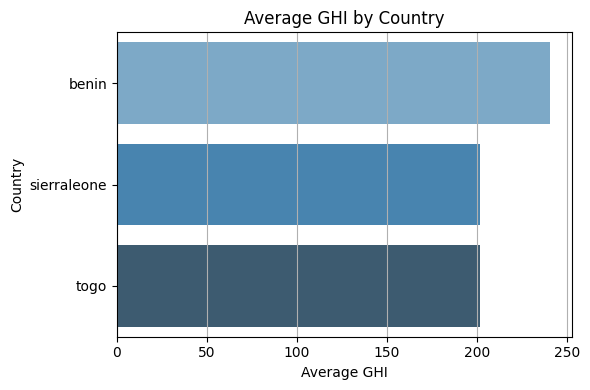

In [9]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, hue=avg_ghi.index, palette='Blues_d', legend=False)
plt.xlabel("Average GHI")
plt.title("Average GHI by Country")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
